In [0]:
import numpy as np
from math import log

import operator

In [0]:
def create_a_dataset():
  D=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
  input_features_names=['no surfacing','flippers']
  return D,input_features_names

In [0]:
def calcShannonEnt(dataset):
  N = len(dataset)
  label_counts={}
  for feature_vect in dataset:
    cur_label = feature_vect[-1]
    if cur_label not in label_counts.keys():
      label_counts[cur_label] = 0
    label_counts[cur_label] += 1

  entropy = 0.0
  for key in label_counts:
    prob = float(label_counts[key])/N
    entropy -= prob * log(prob,2)
    
  return entropy

In [0]:
my_data, my_feature_names = create_a_dataset()
calcShannonEnt(my_data)

0.9709505944546686

In [0]:
my_data[0][-1]='maybe'
calcShannonEnt(my_data)

1.3709505944546687

In [0]:
def chooseBestFeatureToSplit(dataset):
  n_features = len(dataset[0]) - 1 # class variable
  baseEntropy = calcShannonEnt(dataset) # Compute the entropy before split : H(Y)
  # variables for bookkeeping (best score and feature)
  bestInfoGain = 0.0
  bestFeature = -1
  
  for i in range(n_features):
    feature_list = [observation[i] for observation in dataset]
    unique_vals = set(feature_list)

    condEntropy = 0.0
    for value in unique_vals:
      subset = split(dataset,i,value)
      prob = len(subset)/float(len(dataset))
      condEntropy+=prob*calcShannonEnt(subset)
    infoGain = baseEntropy - condEntropy

    if infoGain > bestInfoGain:
      bestInfoGain = infoGain
      bestFeature = i
    
  return bestFeature

In [0]:
def split(dataset, axis, value):
  res = []
  for feature_vect in dataset:
    if feature_vect[axis] == value:
      reduced_feature_vect = feature_vect[:axis]
      reduced_feature_vect.extend(feature_vect[axis+1:])
      res.append(reduced_feature_vect)

  return res

In [0]:
a = [1,2,3]
b = [4,5,6]
a.append(b)   #b를 통째로 추가함
print(a)

a = [1,2,3]
b = [4,5,6]
a.extend(b)   #b의 변수들을 넣어서 a를 확장함
print(a)

[1, 2, 3, [4, 5, 6]]
[1, 2, 3, 4, 5, 6]


In [0]:
my_data, my_classes = create_a_dataset()
print('Test#1: ',split(my_data, 0, 1))
print('Test#2: ',split(my_data, 0, 0))


Test#1:  [[1, 'yes'], [1, 'yes'], [0, 'no']]
Test#2:  [[1, 'no'], [1, 'no']]


In [0]:
def train_DT(dataset, feature_names):
  class_vals = [instance[-1] for instance in dataset]

  if class_vals.count(class_vals[0]) == len(class_vals):
    return class_vals[0]

  if len(dataset[0]) == 1:
    return majority_count(class_vals)

  bestFeature = chooseBestFeatureToSplit(dataset)
  bestFeatureName = feature_names[bestFeature]

  tree = {bestFeatureName:{}}

  del(feature_names[bestFeature])

  feature_vals = [instance[bestFeature] for instance in dataset]
  unique_vals = set(feature_vals)
  for value in unique_vals:
    subset_feature_names = feature_names[:]
    tree[bestFeatureName][value] = train_DT(split(dataset, bestFeature, value), subset_feature_names)

  return tree

def majority_count(classes):
  class_count = {}
  for vote in classes:
    if vote not in class_count.keys():
      class_count[vote] = 0
    class_count[vote] += 1
  sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
  return sorted_class_count[0][0]

In [0]:
my_data, my_classes = create_a_dataset()
my_tree = train_DT(my_data, my_classes)
print(my_tree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [0]:
def classify_DT(inputTree, feature_names, X_ts):
  firstStr = list(inputTree)[0]
  secondDict = inputTree[firstStr]
  featIndex = feature_names.index(firstStr)
  for key in secondDict.keys():
    if X_ts[featIndex] == key:
      if type(secondDict[key]).__name__=='dict':
        classLabel = classify_DT(secondDict[key], feature_names, X_ts)
      else:
        classLabel = secondDict[key]
  return classLabel

In [0]:
X, y = create_a_dataset()
classify_DT(my_tree, y, [1,0])



'no'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file = open('drive/My Drive/2020winter-MLcamp/content/lenses.txt')
lenses = [inst.strip().split('\t') for inst in file.readlines()]

lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

lensesTree = train_DT(lenses, lensesLabels)

print(lensesTree)

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'young': 'soft', 'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}}}, 'yes': {'prescript': {'hyper': {'age': {'young': 'hard', 'pre': 'no lenses', 'presbyopic': 'no lenses'}}, 'myope': 'hard'}}}}, 'reduced': 'no lenses'}}


In [0]:
import matplotlib.pyplot as plt

# shape palette
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle='<-')

def plotNode(nodeTxt,centerPt, parentPt, nodeType):
  createPlot.ax1.annotate(nodeTxt,xy=parentPt, xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',
                          va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)

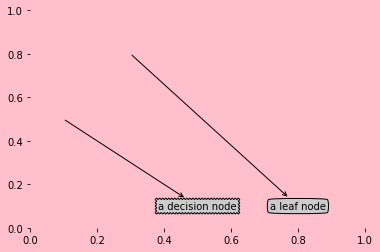

In [0]:
def createPlot():
  fig=plt.figure(1,facecolor='pink')
  fig.clf()
  createPlot.ax1 = plt.subplot(111,frameon=False)
  plotNode('a decision node',(0.5,0.1),(0.1,0.5),decisionNode)
  plotNode('a leaf node',(0.8,0.1),(0.3,0.8),leafNode)
  plt.show()

createPlot()

In [0]:
def getNumLeafs(myTree):
  numLeafs = 0
  firstStr = list(myTree)[0]
  secondDict = myTree[firstStr]
  for key in secondDict.keys():
    if type(secondDict[key]).__name__=='dict':
      numLeafs += getNumLeafs(secondDict[key])
    else:
      numLeafs += 1
  return numLeafs
def getTreeDepth(myTree):
  maxDepth = 0
  firstStr = list(myTree)[0]
  secondDict = myTree[firstStr]
  for key in secondDict.keys():
    if type(secondDict[key]).__name__ == 'dict':
      thisDepth = 1 + getTreeDepth(secondDict[key])
    else:
      thisDepth = 1
    if thisDepth > maxDepth:
      maxDepth = thisDepth
  return maxDepth

In [0]:
def plotTree(myTree, parentPt, nodeTxt):
  numLeafs = getNumLeafs(myTree)
  getTreeDepth(myTree)
  firstStr = list(myTree)[0]
  cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
  plotMidText(cntrPt, parenPt, nodeTxt)
  plotNode(firstStr, cntrPt, parentPt, decisionNode)

  secondDict = myTree[firstStr]
  plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD

  for key in secondDict.keys():
    if type(secondDict[key])._name_=='dict':
      plotTree(secondDict[key], cntrPt, str(key))
    else:
      plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
      plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
      plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
  plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def plotMidText(cntrPt, parentPt, txtString):
  xMid = (ParentPt[0]-cntePt[0])/2.0 + cntePt[0]
  yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
  createPlot.ax1.text(xMid, yMid, txtString)
  

In [0]:
# create a demo tree
def retrieveTree(i):
  listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                ]
  return listOfTrees[i]

demoTree = retrieveTree(1)
print(demoTree)
print('getNumLeafs(demoTree)=', getNumLeafs(demoTree))
print('getTreeDepth(demoTree)=', getTreeDepth(demoTree))

demoTree = retrieveTree(0)
print(demoTree)
print('getNumLeafs(demoTree)=', getNumLeafs(demoTree))
print('getTreeDepth(demoTree=)', getTreeDepth(demoTree))

{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
getNumLeafs(demoTree)= 4
getTreeDepth(demoTree)= 3
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
getNumLeafs(demoTree)= 3
getTreeDepth(demoTree=) 2


In [0]:
def plotTree(myTree, parentPt, nodeTxt):
  numLeafs = getNumLeafs(myTree)
  getTreeDepth(myTree)
  firstStr = list(myTree)[0]
  cntrPt = (plotTree.x0ff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.y0ff)
  plotMidText(cntrPt, parentPt, nodeTxt)
  plotNode(firstStr, cntrPt, parentPt, decisionNode)

  secondDict = myTree[firstStr]
  plotTree.y0ff = plotTree.y0ff - 1.0/plotTree.totalD

  for key in secondDict.keys():
    if type(secondDict[key]).__name__=='dict':
      plotTree(secondDict[key],cntrPt,str(key))
    else:
      plotTree.x0ff = plotTree.x0ff + 1.0/plotTree.totalW
      plotNode(secondDict[key], (plotTree.x0ff, plotTree.y0ff), cntrPt, leafNode)
      plotMidText((plotTree.x0ff, plotTree.y0ff), cntrPt, str(key))

  plotTree.y0ff = plotTree.y0ff + 1.0/plotTree.totalD

def plotMidText(cntrPt, parentPt, txtString):
  xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
  yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
  createPlot.ax1.text(xMid, yMid, txtString)

In [0]:
def createPlot(inTree):
  flg = plt.figure(1,facecolor='white')
  flg.clf()
  axprops = dict(xticks=[],yticks=[])
  createPlot.ax1 = plt.subplot(111,frameon=False, **axprops)
  plotTree.totalW = float(getNumLeafs(inTree))
  plotTree.totalD = float(getTreeDepth(inTree))
  plotTree.x0ff = -0.5/plotTree.totalW
  plotTree.y0ff = 1.0
  plotTree(inTree,(0.5,1.0),'')
  plt.show()

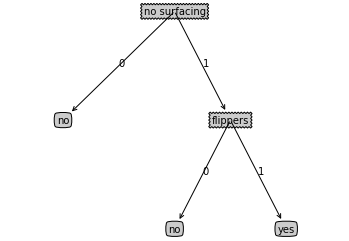

In [0]:
# try out
demoTree = retrieveTree(0)
createPlot(demoTree)

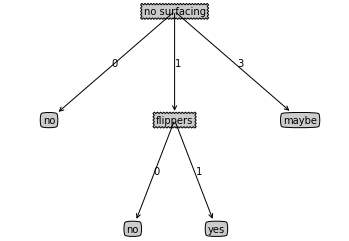

In [0]:
demoTree['no surfacing'][3]='maybe'
demoTree
createPlot(demoTree)

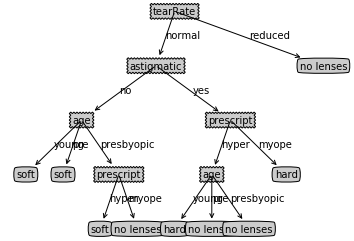

In [0]:
file = open('drive/My Drive/2020winter-MLcamp/content/lenses.txt')
lenses = [inst.strip().split('\t') for inst in file.readlines()]
# input feature names
lensesLabels = ['age','prescript','astigmatic','tearRate']

lensesTree = train_DT(lenses, lensesLabels)
createPlot(lensesTree)